Giá vé dự đoán (có bias): 163.05 triệu đồng
Giá vé dự đoán (không bias): 163.02 triệu đồng


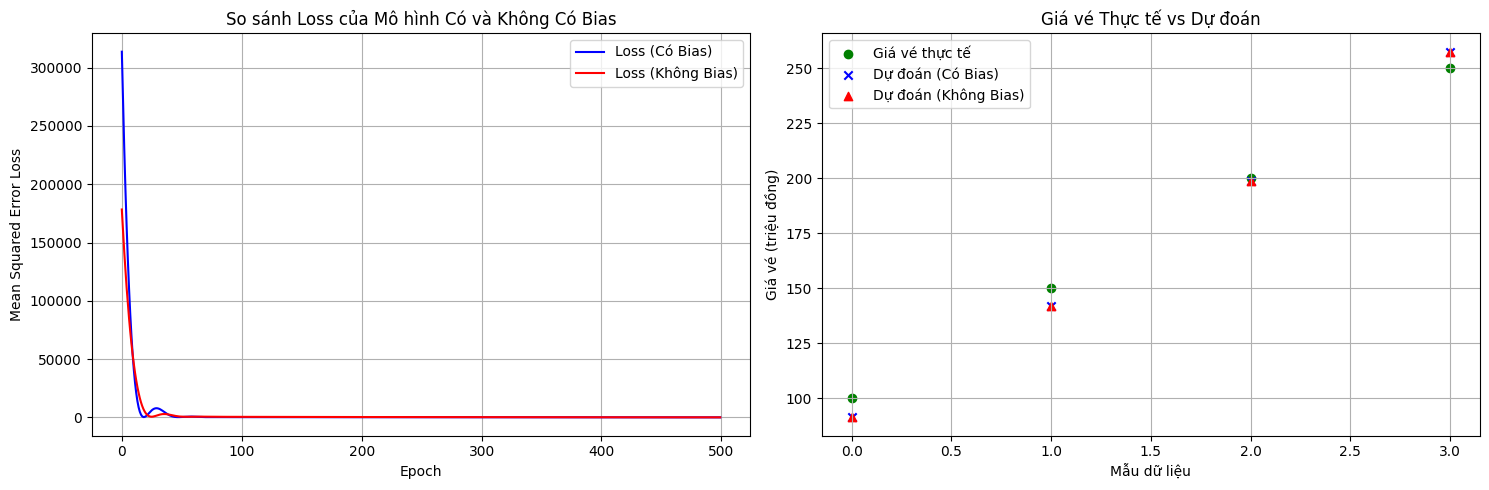


Bias của mô hình có bias:
layer1.bias: [ 0.30829373 -0.74983484  0.4932244   0.5376374   0.24759284 -0.39060956
 -0.25251147  0.5338258 ]
layer2.bias: [0.43558374]


In [20]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu mẫu: Giá vé máy bay dựa trên khoảng cách (km) và thời gian đặt vé (ngày)
X_np = np.array([[500, 30], [1000, 15], [1500, 7], [2000, 1]], dtype=np.float32)  # Explicitly use float32
y_np = np.array([[100], [150], [200], [250]], dtype=np.float32)

# Chuyển sang tensor PyTorch với dtype=torch.float32
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

# Định nghĩa mô hình
class AirfareModel(nn.Module):
    def __init__(self, use_bias=True):
        super(AirfareModel, self).__init__()
        self.layer1 = nn.Linear(2, 8, bias=use_bias)  # Tầng ẩn với 8 nơ-ron
        self.layer2 = nn.Linear(8, 1, bias=use_bias)  # Tầng đầu ra
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Hàm huấn luyện
def train_model(model, X, y, epochs=500):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    losses = []
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    # Tính dự đoán sau khi huấn luyện
    with torch.no_grad():  # No gradient computation for predictions
        predictions = model(X).numpy()
    
    return losses, predictions  # Return both losses and predictions

# Huấn luyện mô hình có bias
model_with_bias = AirfareModel(use_bias=True)
losses_with_bias, preds_with_bias = train_model(model_with_bias, X, y)

# Huấn luyện mô hình không có bias
model_without_bias = AirfareModel(use_bias=False)
losses_without_bias, preds_without_bias = train_model(model_without_bias, X, y)

# Dự đoán cho dữ liệu kiểm tra
test_data = torch.tensor([[1200, 10]], dtype=torch.float32)
pred_with_bias = model_with_bias(test_data).item()
pred_without_bias = model_without_bias(test_data).item()
print(f"Giá vé dự đoán (có bias): {pred_with_bias:.2f} triệu đồng")
print(f"Giá vé dự đoán (không bias): {pred_without_bias:.2f} triệu đồng")

# Trực quan hóa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Biểu đồ 1: So sánh Loss
ax1.plot(losses_with_bias, label='Loss (Có Bias)', color='blue')
ax1.plot(losses_without_bias, label='Loss (Không Bias)', color='red')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean Squared Error Loss')
ax1.set_title('So sánh Loss của Mô hình Có và Không Có Bias')
ax1.legend()
ax1.grid(True)

# Biểu đồ 2: Giá vé thực tế vs dự đoán
y_np = y_np.flatten()  # Flatten for plotting
ax2.scatter(range(len(y_np)), y_np, label='Giá vé thực tế', color='green', marker='o')
ax2.scatter(range(len(preds_with_bias)), preds_with_bias, label='Dự đoán (Có Bias)', color='blue', marker='x')
ax2.scatter(range(len(preds_without_bias)), preds_without_bias, label='Dự đoán (Không Bias)', color='red', marker='^')
ax2.set_xlabel('Mẫu dữ liệu')
ax2.set_ylabel('Giá vé (triệu đồng)')
ax2.set_title('Giá vé Thực tế vs Dự đoán')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# In bias của mô hình có bias
print("\nBias của mô hình có bias:")
for name, param in model_with_bias.named_parameters():
    if 'bias' in name:
        print(f"{name}: {param.data.numpy()}")

In [21]:
import torch
import torch.nn as nn

# Định nghĩa một mạng nơ-ron đơn giản
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 5)  # Tầng fully connected: 10 input -> 5 output
        self.fc2 = nn.Linear(5, 2)   # Tầng fully connected: 5 input -> 2 output

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Khởi tạo mạng
model = SimpleNN()

# In trọng số và bias của tầng fc1 trước khi huấn luyện
print("Trọng số của fc1 tại epoch 1 (ngẫu nhiên):")
print(model.fc1.weight)
print("Bias của fc1 tại epoch 1 (ngẫu nhiên hoặc 0):")
print(model.fc1.bias)

# Giả lập dữ liệu đầu vào
input_data = torch.randn(1, 10)  # Batch size 1, input size 10
output = model(input_data)
print("Đầu ra của mạng:", output)

Trọng số của fc1 tại epoch 1 (ngẫu nhiên):
Parameter containing:
tensor([[ 0.0411,  0.0452, -0.0800, -0.2895,  0.1284,  0.1786,  0.0110,  0.0959,
          0.3148, -0.1197],
        [-0.2934,  0.1082, -0.0983, -0.1091,  0.0648, -0.1860, -0.1519,  0.1115,
          0.1920,  0.1986],
        [-0.1271, -0.2963,  0.1598, -0.2826, -0.1967, -0.0971, -0.3060,  0.2894,
         -0.2472,  0.3109],
        [ 0.2001,  0.1049,  0.2968,  0.1483, -0.2437,  0.2608,  0.0909,  0.2573,
          0.0470,  0.0496],
        [ 0.1649, -0.0697,  0.1479, -0.0348, -0.0717, -0.2755,  0.2807,  0.1078,
         -0.3128, -0.2715]], requires_grad=True)
Bias của fc1 tại epoch 1 (ngẫu nhiên hoặc 0):
Parameter containing:
tensor([ 0.2657, -0.2405, -0.2061,  0.2308,  0.2307], requires_grad=True)
Đầu ra của mạng: tensor([[ 0.3693, -0.3867]], grad_fn=<AddmmBackward0>)
